<a href="https://colab.research.google.com/github/esteroktafia/MyProject2/blob/main/Pre_Processing%20Dashboard%20Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dataset

In [3]:
import scipy, json, gdown, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np, plotly.express as px
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import dataset melalui google drive
import pandas as pd
listings = pd.read_csv("https://drive.google.com/uc?id=1PxMOZURkiG6wthI-h_uBH4pLxya9lhG8", encoding = "latin1")
hosts = pd.read_csv("https://drive.google.com/uc?id=1BIIxx2-P_JousRG2TXLTmsbkCtU6oZtw", encoding = "latin1")
reviews = pd.read_csv("https://drive.google.com/uc?id=1H89RKHJRhiG10coMyPXF2UDJ4jyD8r9s", encoding = "latin1")

# Pre-Processing "Listings" Data

In [4]:
listings.sample(5)

,listing_id,listings_name,host_id,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,instant_bookable
11265,46270175,NYC Airbnb 5.,1997143,Bedford-Stuyvesant,Brooklyn,New York,40.69381,-73.94571,Private room in serviced apartment,Private room,2,1.0,"[""Nespresso machine"", ""Fireplace guards"", ""Ref...",135,1,1125,t
3823,17515391,1 BR Apartment in Brooklyn Brownstone,10896859,South Slope,Brooklyn,New York,40.66548,-73.98201,Entire apartment,Entire place,2,1.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""Air ...",114,3,30,f
7246,34142214,"Cozy home, away from home. 15 mins from downtown.",196476281,Concourse,Bronx,New York,40.83117,-73.92218,Private room in apartment,Private room,2,1.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""Air ...",65,1,1125,t
4589,21230082,ALL new modern apartment of 2 bedroom NYC styl...,153419495,Upper East Side,Manhattan,New York,40.76178,-73.96573,Entire house,Entire place,6,2.0,"[""Refrigerator"", ""Microwave"", ""Shampoo"", ""High...",278,2,1125,t
10186,43628886,Comfortable room in Downtown Manhattan NYC,318750232,Chinatown,Manhattan,New York,40.71627,-73.99693,Private room in apartment,Private room,2,1.0,"[""Hair dryer"", ""Iron"", ""Essentials"", ""Hangers""...",59,1,1125,t


In [5]:
# Cek tipe data: DataFrame (df)
print(type(listings))
# Ukuran data
listings.shape

<class 'pandas.core.frame.DataFrame'>


(11849, 17)

In [6]:
listings.columns

Index(['listing_id', 'listings_name', 'host_id', 'neighbourhood', 'district',
       'city', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bedrooms', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'instant_bookable'],
      dtype='object')

In [7]:
# Memeriksa apakah ada duplikat data
duplicate_listings = listings[listings.duplicated(subset=['listing_id'], keep=False)]

if not duplicate_listings.empty:
  print("Terdapat data listings yang terduplikasi.:")
  print(duplicate_listings[['listing_id']])
else:
  print("Tidak terdapat data listings yang terduplikasi.")

Tidak terdapat data listings yang terduplikasi.


In [8]:
# Memeriksa tipe data pada tiap kolom
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11849 entries, 0 to 11848
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   listing_id        11849 non-null  int64  
 1   listings_name     11849 non-null  object 
 2   host_id           11849 non-null  int64  
 3   neighbourhood     11849 non-null  object 
 4   district          11849 non-null  object 
 5   city              11849 non-null  object 
 6   latitude          11849 non-null  float64
 7   longitude         11849 non-null  float64
 8   property_type     11849 non-null  object 
 9   room_type         11849 non-null  object 
 10  accommodates      11849 non-null  int64  
 11  bedrooms          11849 non-null  float64
 12  amenities         11849 non-null  object 
 13  price             11849 non-null  int64  
 14  minimum_nights    11849 non-null  int64  
 15  maximum_nights    11849 non-null  int64  
 16  instant_bookable  11849 non-null  object

Diketahui:
- Terdapat 17 kolom dengan 11.849 baris. Artinya, terdapat 11.849 penginapan dalam data ini.
- Tidak terdapat missing value.
- Tidak terdapat data yang terduplikasi.

In [9]:
# Memeriksa district dalam data
listings['district'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [10]:
# Unique values for 'property_type'
unique_property_types = listings['property_type'].unique()
print("Unique property types:\n", unique_property_types)

# Unique values for 'room_type'
unique_room_types = listings['room_type'].unique()
print("\nUnique room types:\n", unique_room_types)

Unique property types:
 ['Entire guest suite' 'Private room in apartment'
 'Private room in townhouse' 'Entire apartment' 'Entire loft'
 'Private room in house' 'Entire condominium'
 'Private room in condominium' 'Private room in loft' 'Entire townhouse'
 'Entire house' 'Entire guesthouse' 'Room in boutique hotel'
 'Shared room in apartment' 'Private room in bed and breakfast'
 'Shared room in house' 'Room in aparthotel' 'Entire serviced apartment'
 'Shared room in earth house' 'Shared room in hostel'
 'Private room in hostel' 'Private room in guesthouse' 'Entire cottage'
 'Shared room in condominium' 'Private room in guest suite'
 'Room in serviced apartment' 'Private room'
 'Private room in serviced apartment' 'Shared room in loft'
 'Room in hotel' 'Shared room in townhouse' 'Entire floor' 'Houseboat'
 'Private room in villa' 'Entire villa' 'Entire place'
 'Shared room in guest suite' 'Private room in resort' 'Entire bungalow'
 'Tiny house' 'Entire home/apt' 'Private room in tiny hou

Diketahui:
- Terdapat empat room types, yaitu entire place, private room, hotel room, dan shared room.
- Terdapat berbagai property types, seperti entire guest suite, private room in apartment, dan lainnya.

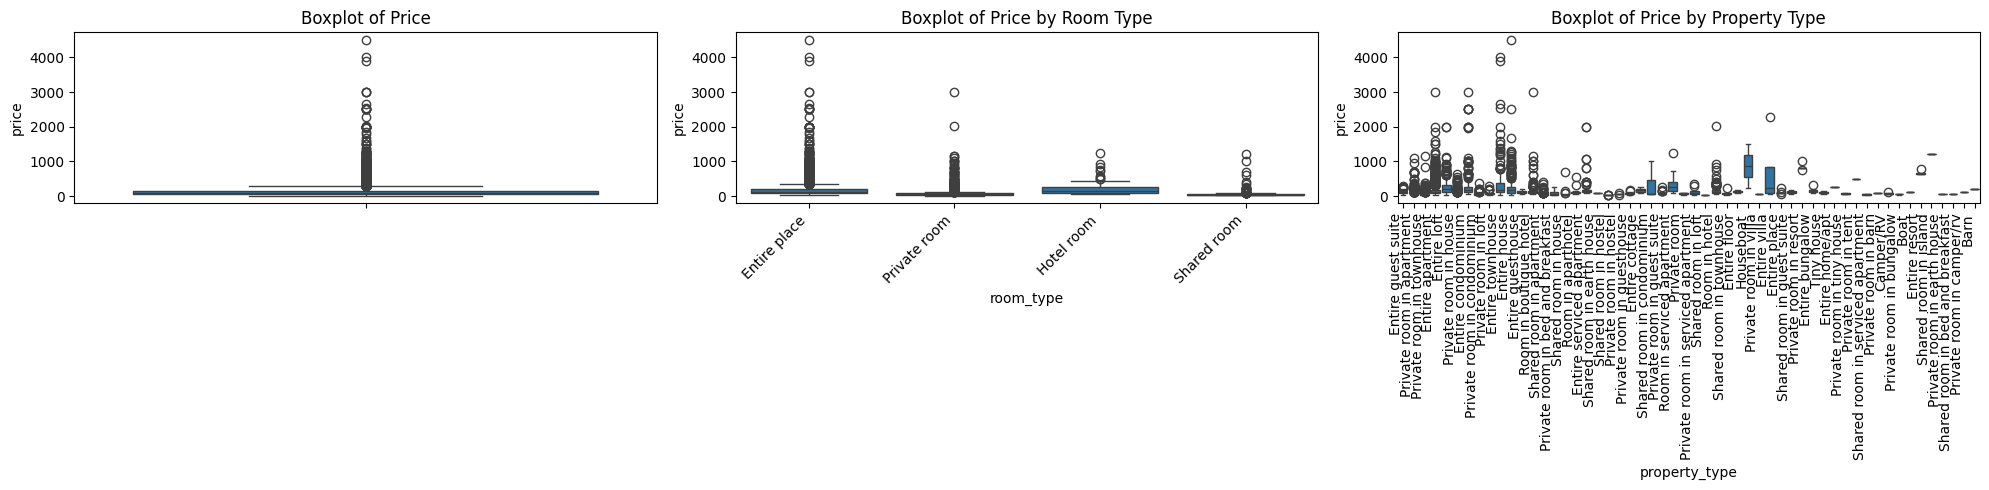

In [14]:
# Boxplot price

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(y=listings['price'], ax=axes[0])
axes[0].set_title('Boxplot of Price')

sns.boxplot(x=listings['room_type'], y=listings['price'], ax=axes[1])
axes[1].set_title('Boxplot of Price by Room Type')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

sns.boxplot(x=listings['property_type'], y=listings['price'], ax=axes[2])
axes[2].set_title('Boxplot of Price by Property Type')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90, ha='right')

plt.tight_layout()
plt.show()

Terlihat pada boxplot-boxplot di atas bahwa harga pada listings memiliki banyak outlier. Oleh karena itu, pada dashboard, dibanding menggunakan "average price", akan digunakan "median price" karena lebih representatif.

# Pre-Processing "Hosts" Data

In [5]:
hosts.head()

,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified
0,2571,2008-08-27,"Brooklyn, New York, United States",within a few hours,0.93,0.67,t,1.0,t,t
1,2782,2008-09-07,"New York, New York, United States",within a day,1.00,0.57,t,2.0,t,t
2,2787,2008-09-07,"New York, New York, United States",within an hour,1.00,0.97,t,8.0,t,f
3,2868,2008-09-10,"New York, New York, United States",within a day,1.00,0.00,f,1.0,t,f
4,2881,2008-09-10,"Brooklyn, New York",within an hour,1.00,0.95,t,5.0,t,t


In [16]:
# Cek tipe data: DataFrame (df)
print(type(hosts))
# Ukuran data
hosts.shape

<class 'pandas.core.frame.DataFrame'>


(7401, 10)

In [17]:
hosts.columns

Index(['host_id', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified'],
      dtype='object')

In [18]:
# Memeriksa apakah ada duplikat data
duplicate_hosts = hosts[hosts.duplicated(subset=['host_id'], keep=False)]

if not duplicate_hosts.empty:
  print("Terdapat data hosts yang terduplikasi.:")
  print(duplicate_hosts[['host_id']])
else:
  print("Tidak terdapat data hosts yang terduplikasi.")

Tidak terdapat data hosts yang terduplikasi.


In [19]:
# Memeriksa tipe data pada tiap kolom
hosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7401 entries, 0 to 7400
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_id                    7401 non-null   int64  
 1   host_since                 7401 non-null   object 
 2   host_location              7401 non-null   object 
 3   host_response_time         7401 non-null   object 
 4   host_response_rate         7401 non-null   float64
 5   host_acceptance_rate       7401 non-null   float64
 6   host_is_superhost          7401 non-null   object 
 7   host_total_listings_count  7401 non-null   float64
 8   host_has_profile_pic       7401 non-null   object 
 9   host_identity_verified     7401 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 578.3+ KB


Diketahui:
- Terdapat 10 kolom dengan 7.401 baris. Artinya, terdapat 7.401 pemilik penginapan dalam data ini.
- Tidak terdapat missing value.
- Tidak terdapat data yang terduplikasi.

In [20]:
# Memeriksa response time of hosts dalam data
hosts['host_response_time'].unique()

array(['within a few hours', 'within a day', 'within an hour',
       'a few days or more'], dtype=object)

In [12]:
# Unique values for host_location

unique_host_locations = hosts['host_location'].unique()
print("Unique host locations:\n", unique_host_locations)

Unique host locations:
 ['Brooklyn, New York, United States' 'New York, New York, United States'
 'Brooklyn, New York' 'San Francisco, California, United States' 'US'
 'Los Angeles, California, United States'
 'Chicago, Illinois, United States' 'Vancouver, British Columbia, Canada'
 'Europe' 'Berkeley, California, United States'
 'Longmont, Colorado, United States' 'Queens, New York, United States'
 'San Miguel de Allende, Guanajuato, Mexico'
 'Stockholm, Stockholm, Sweden'
 'Philadelphia, Pennsylvania, United States' 'New York, United States'
 'San Diego, California, United States'
 'Newburgh, New York, United States' 'Brooklyn, NY'
 'Waukee, Iowa, United States' 'United States'
 'London, England, United Kingdom' 'Italy, New York, United States'
 'New Orleans, Louisiana, United States'
 'Maroubra, New South Wales, Australia'
 'East Hampton, New York, United States'
 'Staten Island, New York, United States'
 'Boston, Massachusetts, United States'
 'Homestead, Florida, United States' 'N

Terlihat bahwa kolom host_location masih sangat kotor karena berisi berbagai deskripsi lokasi yang tidak konsisten, seperti nama kota, negara bagian, istilah umum, bahkan hanya deskripsi. Hal ini menyebabkan kesulitan dalam mengekstrak nama negara secara akurat dan konsisten. Sehingga akan dibuat kolom baru yaitu host_country.

In [21]:
# Fungsi untuk mengekstrak negara dari kolom host_location
def extract_country(location):
    if pd.isnull(location):
        return None
    if 'east to west' in location.lower():
        return None

    # Pisahkan berdasarkan koma dan ambil kata terakhir yang dianggap sebagai negara
    parts = location.split(',')
    country = parts[-1].strip() if len(parts) > 1 else location

    # Bersihkan negara atau wilayah berdasarkan mapping
    country_mapping = {
        'United States': 'US', 'US': 'US', 'California': 'US', 'New York': 'US',
        'Illinois': 'US', 'Washington': 'US', 'Colorado': 'US', 'Florida': 'US',
        'Texas': 'US', 'Massachusetts': 'US', 'Connecticut': 'US', 'Georgia': 'US',
        'Vermont': 'US', 'Maryland': 'US', 'New Jersey': 'US', 'Iowa': 'US',
        'Pennsylvania': 'US', 'Virginia': 'US', 'Ohio': 'US', 'North Carolina': 'US',
        'South Carolina': 'US', 'Hawaii': 'US', 'Utah': 'US', 'Arizona': 'US',
        'Michigan': 'US', 'Nevada': 'US', 'Delaware': 'US', 'Rhode Island': 'US',
        'New Hampshire': 'US', 'Indiana': 'US', 'Louisiana': 'US', 'Missouri': 'US',
        'South Dakota': 'US', 'Kansas': 'US', 'Alaska': 'US', 'NY': 'US', 'USA': 'US',
        'United States and Neversink (120 miles from city)': 'US', 'BROOKLYN': 'US',
        'St thomas Virgin Islands': 'US', 'New York/London' : 'US',
        'South Africa and New York' : 'US', 'Resplendent Residence in heart of Harlem revival' : 'US',
        'Bronx NY' : 'US', 'Booming Bushwick' : 'US', 'NY & anywhere the world takes me!!!' : 'US',
        'The Netherlands' : 'Netherlands', 'Rockaway': 'US', 'Queensland': 'Australia',
        'Canada': 'Canada', 'CA': 'Canada', 'United Kingdom': 'United Kingdom',
        'UK': 'United Kingdom', 'GB': 'United Kingdom', 'DE': 'Germany', 'AU': 'Australia',
        'KR': 'South Korea', 'ES': 'Spain', 'FR': 'France', 'BR': 'Brazil', 'IT': 'Italy',
        'PT': 'Portugal', 'JM': 'Jamaica', 'ZA': 'South Africa', 'GH': 'Ghana', 'PE': 'Peru',
        'JP': 'Japan', 'IN': 'India', 'RU': 'Russia', 'UY': 'Uruguay', 'NI': 'Nicaragua',
        'VE': 'Venezuela', 'GT': 'Guatemala', 'UA': 'Ukraine', 'AM': 'Armenia', 'IL': 'Israel',
        'CH': 'Switzerland', 'TR': 'Turkey', 'NP': 'Nepal', 'CR': 'Costa Rica', 'CL': 'Chile',
        'PH': 'Philippines', 'CN': 'China', 'PR' : 'Puerto Rico', 'London': 'United Kingdom',
        'Stockholm': 'Sweden', 'Seoul, Korea' : 'South Korea', 'Korea': 'South Korea',
    }

    return country_mapping.get(country, country)

# Terapkan fungsi untuk membuat kolom cleaned host_country
hosts['host_country'] = hosts['host_location'].apply(extract_country)

print(hosts[['host_location', 'host_country']].head())

                       host_location host_country
0  Brooklyn, New York, United States           US
1  New York, New York, United States           US
2  New York, New York, United States           US
3  New York, New York, United States           US
4                 Brooklyn, New York           US


In [22]:
# Memeriksa country hosts dalam data
hosts['host_country'].unique()

array(['US', 'Canada', 'Europe', 'Mexico', 'Sweden', 'United Kingdom',
       'Australia', 'Norway', 'Portugal', 'France', 'Colombia', 'Greece',
       'Germany', 'Spain', 'South Africa', 'Israel', 'Switzerland',
       'Thailand', 'Brazil', 'Guatemala', 'Argentina', 'Italy', None,
       'Netherlands', 'Poland', 'Austria', 'Dominican Republic',
       'Belgium', 'Puerto Rico', 'South Korea', 'Uruguay', 'Cuba',
       'Haiti', 'Jamaica', 'Japan', 'Taiwan', 'Ecuador',
       'Trinidad and Tobago', 'Curacao', 'Chile', 'India', 'Philippines',
       'Venezuela', 'Russia', 'Peru', 'Ukraine', 'Nicaragua', 'Ghana',
       'Armenia', 'Turkey', 'China', 'Costa Rica', 'Nepal'], dtype=object)

In [24]:
# Create a new DataFrame with 'host_id' and 'host_country'
new_df = hosts[['host_id', 'host_country']].copy()

# Download the DataFrame as a CSV file
from google.colab import files
new_df.to_csv('host_country.csv', encoding='utf-8', index=False)
files.download('host_country.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Pre-Processing "Reviews" Data

In [23]:
reviews.head()

,review_id,listing_id,reviewer_id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_date
0,1743,5803,9868,94.0,10.0,10.0,10.0,10.0,10.0,10.0,2009-04-23
1,2091,5178,8443,84.0,9.0,8.0,9.0,9.0,10.0,9.0,2009-05-06
2,2767,5803,16345,94.0,10.0,10.0,10.0,10.0,10.0,10.0,2009-05-17
3,3015,5178,15642,84.0,9.0,8.0,9.0,9.0,10.0,9.0,2009-05-23
4,3549,5803,19091,94.0,10.0,10.0,10.0,10.0,10.0,10.0,2009-06-03


In [24]:
# Cek tipe data: DataFrame (df)
print(type(reviews))
# Ukuran data
reviews.shape

<class 'pandas.core.frame.DataFrame'>


(514467, 11)

In [25]:
reviews.columns

Index(['review_id', 'listing_id', 'reviewer_id', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'review_date'],
      dtype='object')

In [27]:
# Memeriksa apakah ada duplikat data
duplicate_reviews = reviews[reviews.duplicated(subset=['review_id'], keep=False)]

if not duplicate_reviews.empty:
  print("Terdapat data reviews yang terduplikasi.:")
  print(duplicate_reviews[['review_id']])
else:
  print("Tidak terdapat data reviews yang terduplikasi.")

Tidak terdapat data reviews yang terduplikasi.


In [28]:
# Memeriksa tipe data pada tiap kolom
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514467 entries, 0 to 514466
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   review_id                    514467 non-null  int64  
 1   listing_id                   514467 non-null  int64  
 2   reviewer_id                  514467 non-null  int64  
 3   review_scores_rating         514467 non-null  float64
 4   review_scores_accuracy       514467 non-null  float64
 5   review_scores_cleanliness    514467 non-null  float64
 6   review_scores_checkin        514467 non-null  float64
 7   review_scores_communication  514467 non-null  float64
 8   review_scores_location       514467 non-null  float64
 9   review_scores_value          514467 non-null  float64
 10  review_date                  514467 non-null  object 
dtypes: float64(7), int64(3), object(1)
memory usage: 43.2+ MB


Diketahui:
- Terdapat 11 kolom dengan 514.467 baris. Artinya, terdapat 514.467 reviews yang terdata dalam data ini.
- Tidak terdapat missing value.
- Tidak terdapat data yang terduplikasi.